In [3]:
import pymysql.cursors
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import connect_to_db as cn

In [53]:
def draw_cdf(np_result):
    fig = plt.figure(figsize=(15,10))
    fig.set_facecolor('white')
    ax = fig.add_subplot()
    
    sorted_data = np.sort(np_result)
    plt.step(sorted_data, np.arange(sorted_data.size), cumulative=True, density=True)

    # plt.xscale('symlog')

    plt.show()

In [92]:
def draw_multiple_cdf(np_result_list, title, colors, legends, xlabel):
    filename = title + '.png'
    fig = plt.figure(figsize=(15,10))
    fig.set_facecolor('white')
    ax = fig.add_subplot()
    
    for np_result, color, legend in zip(np_result_list, colors, legends):
        sorted_data = np.sort(np_result)
        plt.step(sorted_data, np.arange(sorted_data.size), label=legend, color=color)
        plt.xlabel(xlabel, fontsize=12)
        plt.title(title, fontsize=18)
  
    plt.legend(fontsize=14)
    plt.savefig(filename, dpi=300)
    plt.show()

In [69]:
def draw_cdf4(np_result):
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    kwargs = {'cumulative': True}
    sns.distplot(np_result, hist_kws=kwargs, kde_kws=kwargs, hist=False, norm_hist=False)

In [32]:
sql = 'select * from mentor;'
result_df = cn.select_query_result_to_df(sql)
result_df

,author,comment_cnt,mentee_cnt,average_is_score,average_es_score,comments_similarity,posts_similarity,is_score_entropy,es_score_entropy,average_vote
0,_________________UWU,1,1,2.00000000,2.00000000,None,None,0E-8,0E-8,1.00000
1,______________Blank,1,1,2.00000000,2.00000000,None,None,0E-8,0E-8,1.00000
2,_________-----------,1,1,3.00000000,1.00000000,None,None,0E-8,0E-8,1.00000
3,_________ez_________,1,1,1.00000000,2.00000000,None,None,0E-8,0E-8,1.00000
4,_______woohoo,1,1,1.00000000,2.00000000,None,None,0E-8,0E-8,3.00000
...,...,...,...,...,...,...,...,...,...,...
461352,Zzzzz315,1,1,1.00000000,3.00000000,None,None,0E-8,0E-8,1.00000
461353,zzzzzima,2,2,2.00000000,2.00000000,0.16390613,0E-8,0E-8,0.63092975,13.00000
461354,zzzzzsleepyzzzzz,2,2,1.50000000,1.50000000,0.03616722,0.04416443,0.63092975,0.63092975,1.50000
461355,zzzzzzz____,2,2,1.00000000,2.00000000,0.23076793,0E-8,0E-8,0E-8,1.50000


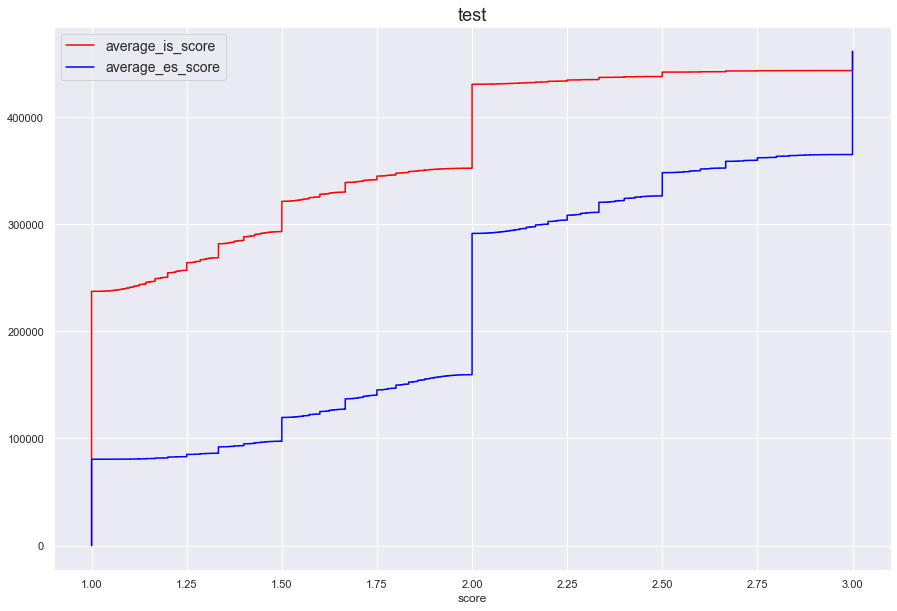

In [73]:
np_result_list = []
np_result_list.append(np.array(result_df['average_is_score'].tolist()))
np_result_list.append(np.array(result_df['average_es_score'].tolist()))
colors = ['red', 'blue']
legends = ['average_is_score', 'average_es_score']
draw_multiple_cdf(np_result_list, 'test', colors, legends, 'score')

/home/mykim/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


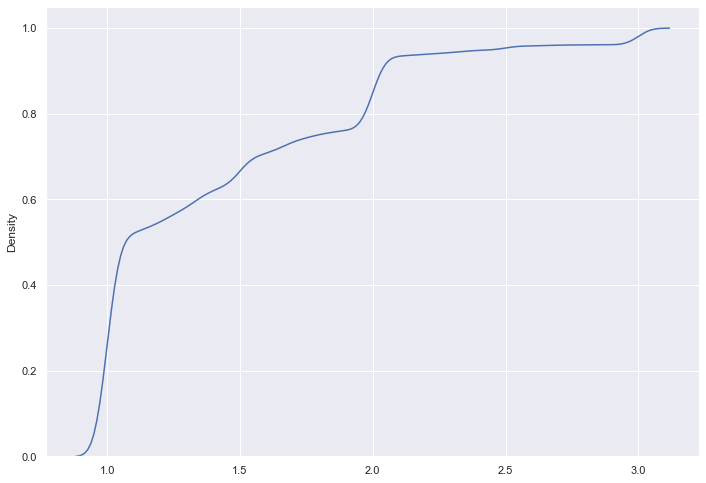

In [70]:
np_result1 = np.array(result_df['average_is_score'].tolist())
draw_cdf4(np_result1)

In [94]:
sql2 = 'select * from mentor where comments_similarity >= 0;'
result_df2 = cn.select_query_result_to_df(sql2)
result_df2

,author,comment_cnt,mentee_cnt,average_is_score,average_es_score,comments_similarity,posts_similarity,is_score_entropy,es_score_entropy,average_vote
0,_______ZERO,10,10,1.10000000,2.20000000,0.09195855,0.05160771,0.29590327,0.81734542,6.60000
1,______V______,6,6,1.33333333,2.66666667,0.10136209,0.04694719,0.57938016,0.57938016,1.16667
2,_____0_,2,2,1.00000000,2.50000000,0.07903821,0.03580134,0E-8,0.63092975,2.50000
3,_____boop,7,7,1.28571429,2.85714286,0.15010499,0.02310080,0.54456845,0.37330396,1.71429
4,_____els3sle-,8,7,1.25000000,1.87500000,0.13326611,0.04322288,0.51185951,0.88685951,2.00000
...,...,...,...,...,...,...,...,...,...,...
224401,ZzzzoZzzzo,3,3,1.66666667,1.33333333,0.12780807,0.13645193,0.57938016,0.57938016,2.33333
224402,zzzztheday,11,11,1.54545455,2.18181818,0.11286962,0.03088349,0.82607422,0.94318878,3.36364
224403,zzzzzima,2,2,2.00000000,2.00000000,0.16390613,0E-8,0E-8,0.63092975,13.00000
224404,zzzzzsleepyzzzzz,2,2,1.50000000,1.50000000,0.03616722,0.04416443,0.63092975,0.63092975,1.50000


In [95]:
sql3 = 'select * from mentor where posts_similarity >= 0;'
result_df3 = cn.select_query_result_to_df(sql3)
result_df3

,author,comment_cnt,mentee_cnt,average_is_score,average_es_score,comments_similarity,posts_similarity,is_score_entropy,es_score_entropy,average_vote
0,_______ZERO,10,10,1.10000000,2.20000000,0.09195855,0.05160771,0.29590327,0.81734542,6.60000
1,______V______,6,6,1.33333333,2.66666667,0.10136209,0.04694719,0.57938016,0.57938016,1.16667
2,_____0_,2,2,1.00000000,2.50000000,0.07903821,0.03580134,0E-8,0.63092975,2.50000
3,_____boop,7,7,1.28571429,2.85714286,0.15010499,0.02310080,0.54456845,0.37330396,1.71429
4,_____els3sle-,8,7,1.25000000,1.87500000,0.13326611,0.04322288,0.51185951,0.88685951,2.00000
...,...,...,...,...,...,...,...,...,...,...
220836,ZzzzoZzzzo,3,3,1.66666667,1.33333333,0.12780807,0.13645193,0.57938016,0.57938016,2.33333
220837,zzzztheday,11,11,1.54545455,2.18181818,0.11286962,0.03088349,0.82607422,0.94318878,3.36364
220838,zzzzzima,2,2,2.00000000,2.00000000,0.16390613,0E-8,0E-8,0.63092975,13.00000
220839,zzzzzsleepyzzzzz,2,2,1.50000000,1.50000000,0.03616722,0.04416443,0.63092975,0.63092975,1.50000


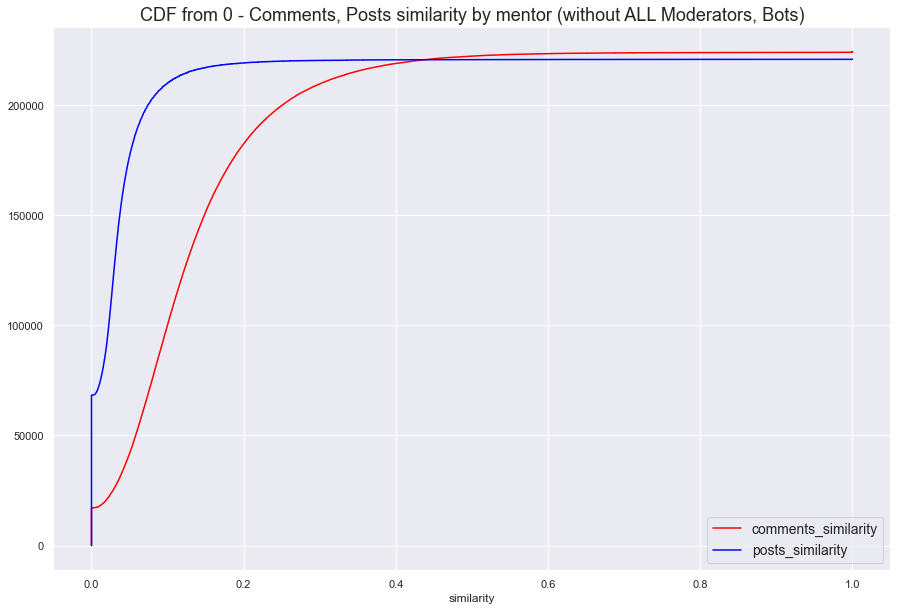

In [96]:
np_result_list2 = []
np_result_list2.append(np.array(result_df2['comments_similarity'].tolist()))
np_result_list2.append(np.array(result_df3['posts_similarity'].tolist()))

colors = ['red', 'blue']
legends = ['comments_similarity', 'posts_similarity']
draw_multiple_cdf(np_result_list2, 'CDF from 0 - Comments, Posts similarity by mentor (without ALL Moderators, Bots)', colors, legends, 'similarity')

In [80]:
result_df4 = pd.read_csv('random_similarity_2.csv')
print(result_df4)

     random_comments_similarity  random_posts_similarity
0                      0.000000                 0.000000
1                      0.170055                 0.000000
2                      0.072244                 0.000000
3                      0.033894                 0.078745
4                      0.071075                 0.000000
..                          ...                      ...
995                    0.199084                 0.000000
996                    0.084693                 0.000000
997                    0.079526                 0.000000
998                    0.000000                 0.059930
999                    0.181773                 0.000000

[1000 rows x 2 columns]


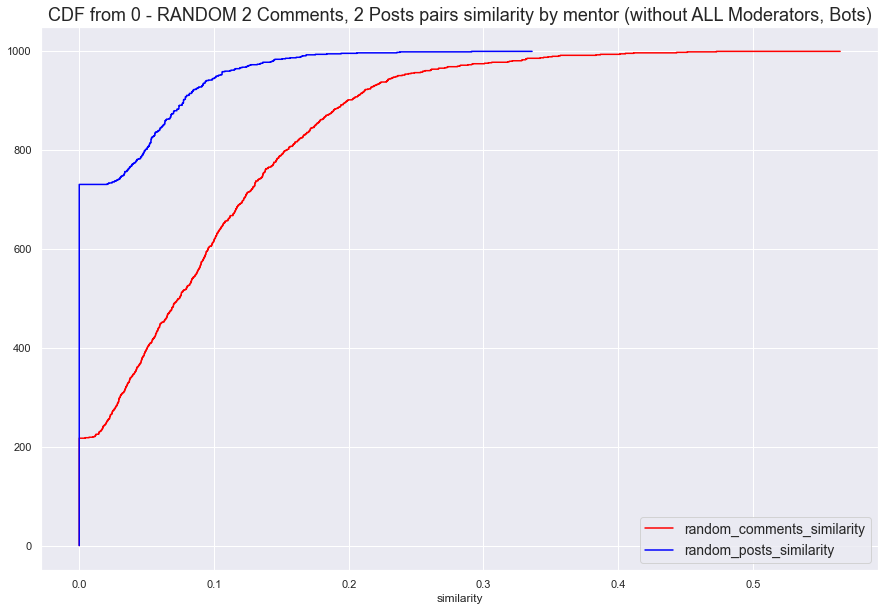

In [97]:
np_result_list3 = []
np_result_list3.append(np.array(result_df4['random_comments_similarity'].tolist()))
np_result_list3.append(np.array(result_df4['random_posts_similarity'].tolist()))

colors = ['red', 'blue']
legends = ['random_comments_similarity', 'random_posts_similarity']
draw_multiple_cdf(np_result_list3, 'CDF from 0 - RANDOM 2 Comments, 2 Posts pairs similarity by mentor (without ALL Moderators, Bots)', colors, legends, 'similarity')

In [85]:
result_df5 = pd.read_csv('random_similarity_4.csv')
print(result_df5)

     random_comments_similarity  random_posts_similarity
0                      0.096070                 0.021508
1                      0.042308                 0.046670
2                      0.113791                 0.034269
3                      0.090947                 0.023521
4                      0.070478                 0.021279
..                          ...                      ...
995                    0.088427                 0.025323
996                    0.057559                 0.000000
997                    0.066319                 0.000000
998                    0.136684                 0.000000
999                    0.007605                 0.010563

[1000 rows x 2 columns]


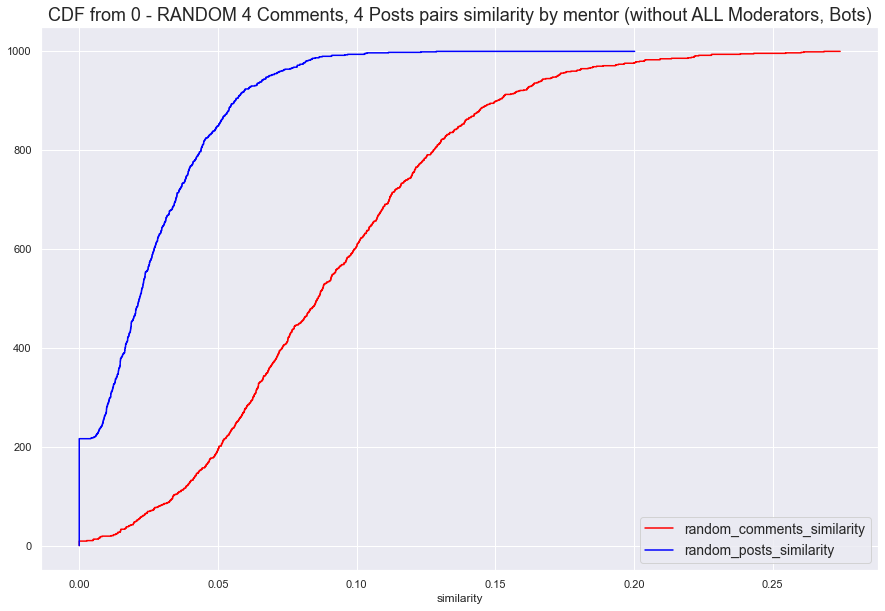

In [98]:
np_result_list4 = []
np_result_list4.append(np.array(result_df5['random_comments_similarity'].tolist()))
np_result_list4.append(np.array(result_df5['random_posts_similarity'].tolist()))

colors = ['red', 'blue']
legends = ['random_comments_similarity', 'random_posts_similarity']
draw_multiple_cdf(np_result_list4, 'CDF from 0 - RANDOM 4 Comments, 4 Posts pairs similarity by mentor (without ALL Moderators, Bots)', colors, legends, 'similarity')